# 비디오 게임 판매량 데이터셋을 이용하여 글로벌 판매량(Global_Sales) 예측

### 주요 Feature 설명

Rank - 전체 매출 순위 Ranking of overall sales

Name - 게임 이름 The games name

Platform - 게임 출시 플랫폼 Platform of the games release (i.e. PC,PS4, etc.)

Year - 게임 출시 연도 Year of the game's release

Genre - 게임의 장르 Genre of the game

Publisher - 게임 제작사 Publisher of the game

NA_Sales - 북미 지역 판매량(백만단위) Sales in North America (in millions)

EU_Sales - 유럽 지역 판매량(백만단위) Sales in Europe (in millions)

JP_Sales - 일본 지역 판매량(백만단위) Sales in Japan (in millions)

Other_Sales - 그외 지역 판매량(백만단위)  Sales in the rest of the world (in millions)

Global_Sales - 전 세계 총 판매량(백만단위) Total worldwide sales.

### 0. 데이터 불러오기 및 라이브러리 import

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 1. EDA 및 전처리

1) 결측치 처리

2) 지역에 따라 장르별 판매량의 합을 시각화하여 표현

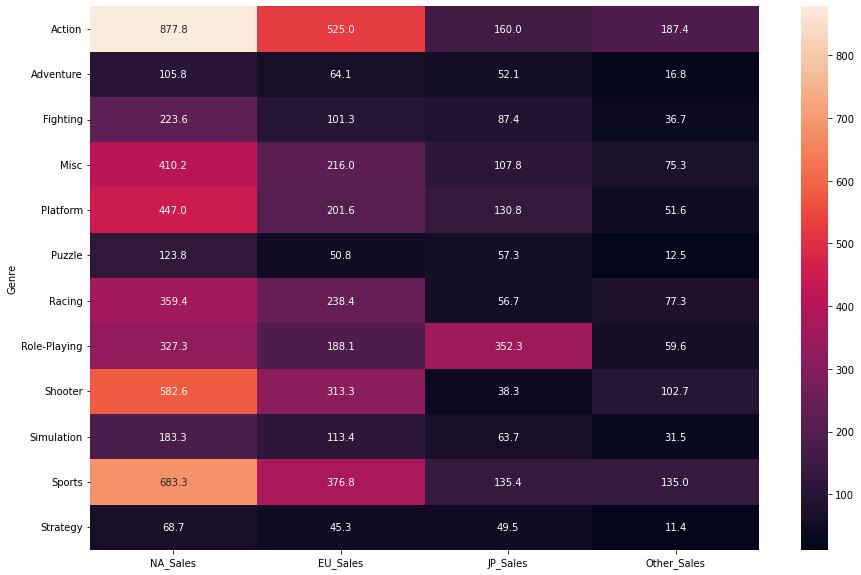

In [ ]:
# 아래와 같이 시각화해주세요!

#### 결측치 처리

In [41]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [42]:
data[data['Genre'] =='Action']['NA_Sales'].sum()

877.83

In [4]:
data_group = np.round(data.groupby('Genre')[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(),1)
data_group

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.8,525.0,160.0,187.4
Adventure,105.8,64.1,52.1,16.8
Fighting,223.6,101.3,87.4,36.7
Misc,410.2,216.0,107.8,75.3
Platform,447.0,201.6,130.8,51.6
Puzzle,123.8,50.8,57.3,12.5
Racing,359.4,238.4,56.7,77.3
Role-Playing,327.3,188.1,352.3,59.6
Shooter,582.6,313.3,38.3,102.7


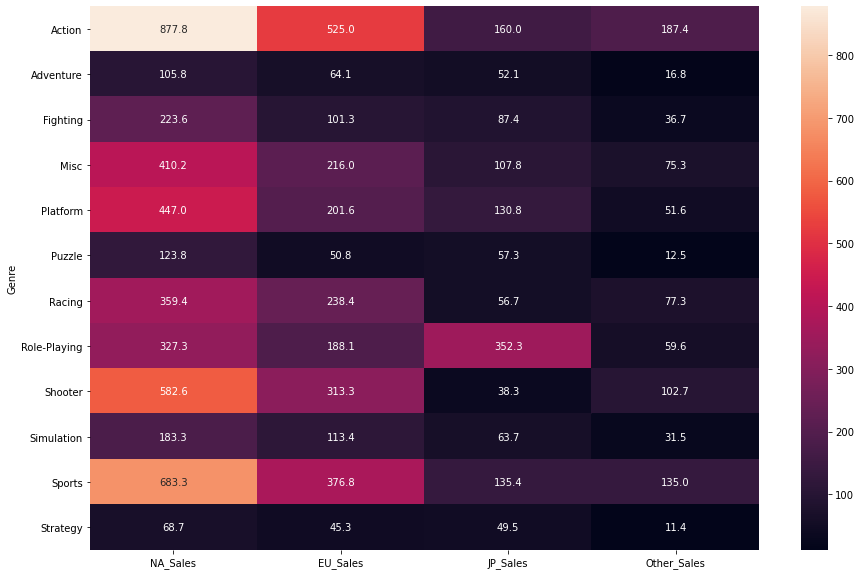

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_group, annot=True, fmt='.1f')
plt.show()

### 2. 통계분석(1)

판매 지역(NA, EU, JP, Other)에 따라 판매량에 차이가 있는지 검정

- Sale_Area 변수는 비디오 게임 판매 지역, Sales는 판매량을 의미하게 데이터프레임 변형

- 판매 지역(Sale_Area 변수)에 따라 판매량(Sales)의 평균에 유의미한 차이가 존재하는지 일원배치 분산분석을 수행하고, 그 결과를 해석해라. [ 유의수준 0.05 기준 ]

In [ ]:
# 참고(데이터셋변형)

,Sale_Area,Sales
0,NA_Sales,41.49
1,NA_Sales,29.08
2,NA_Sales,15.85
3,NA_Sales,15.75
4,NA_Sales,11.27
...,...,...
66387,Other_Sales,0.00
66388,Other_Sales,0.00
66389,Other_Sales,0.00
66390,Other_Sales,0.00


In [49]:
data_melt = data.melt(value_vars=['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'],
              var_name='Sale_Area',value_name='Sales')
data_melt.head()

,Sale_Area,Sales
0,NA_Sales,41.49
1,NA_Sales,29.08
2,NA_Sales,15.85
3,NA_Sales,15.75
4,NA_Sales,11.27


#### 정규성 검정

#### 앤더스-달링 검정(Anderson–Darling test)

표본수(n)가 5000 이상인 데이터셋에 적합한 정규성 검정  

귀무가설 H0: 데이터셋이 정규분포를 따른다.

연구가설 H1: 데이터셋이 정규분포를 따르지 않는다

critical_values => 기각역 , 임계값

significance_level => 유의수준, 15%, 10%, 5%, 2.5%, 1%

In [17]:
from scipy import stats
stats.anderson(x = data_melt['Sales'], dist = 'norm')

AndersonResult(statistic=15168.631919166568, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [18]:
stats.shapiro(data_melt['Sales'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.21980059146881104, pvalue=0.0)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

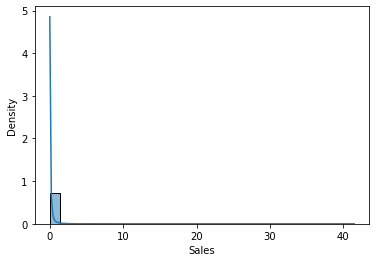

In [25]:
sns.histplot(data_melt['Sales'], bins=30,kde=True,stat="density")
# data_melt['Sales'].describe()

#### 정규성 검정 해석
앤더스-달링 검정 결과 통계량 15168 기각역 0.787 보다 훨씬 크기 때문에 귀무가설을 기각한다.
즉 데이터셋이 정규분포를 따르지 않는다

histplot 를 보더라도 데이터가 0쪽에 많이 있는것으로 보아 정규분포를 따르지 않는다고 볼수 있다.

정규성을 따르지 않기 때문에 비모수적 방법 크루스칼 왈리스 검정(Kruskal-Wallis test)을 수행한다.

#### 분산분석 검정(크루스칼 왈리스 검정)

귀무가설: 판매 지역에 따라 판매량은 모두 동일하다.

연구가설: 판매 지역에 따라 판매량은 모두 동일하지는 않다.

In [48]:
from scipy.stats import kruskal

a = data['NA_Sales']
b = data['EU_Sales']
c = data['JP_Sales']
d = data['Other_Sales']

print(kruskal(a, b, c, d))

KruskalResult(statistic=6944.762123221585, pvalue=0.0)


#### 분산분석 검정 결과
Pvalue 가 0이기 때문에 귀무가설을 기각 하고 연구가설을 채택

즉 판매 지역에 따라 비디오 게임 판매량은 동일 하지 않다 

#### 사후분석

In [52]:
import scikit_posthocs as sp
#pandas출력 옵션설정 - float형식으로 수치표기  
pd.set_option('display.float_format', '{:.2f}'.format)

sp.posthoc_conover(data_melt,
                  val_col = 'Sales',
                  group_col='Sale_Area',
                  p_adjust='holm')
# p_adjust : 다중비교(또는 사후분석)의 방법
# 'holm' : Bonferroni 방법

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
EU_Sales,1.00,0.00,0.00,0.00
JP_Sales,0.00,1.00,0.00,0.00
NA_Sales,0.00,0.00,1.00,0.00
Other_Sales,0.00,0.00,0.00,1.00


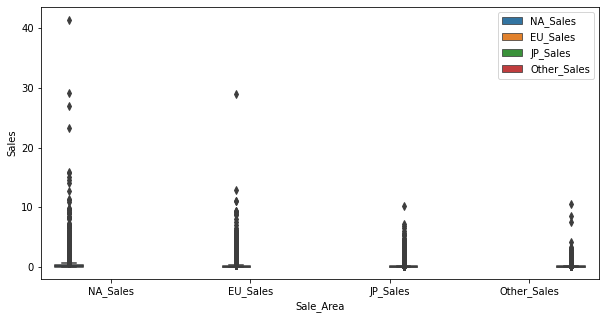

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data_melt, x="Sale_Area", y="Sales", hue=data_melt['Sale_Area'].tolist() )
plt.show()

In [57]:
data_melt.groupby('Sale_Area').mean()

,Sales
Sale_Area,
EU_Sales,0.15
JP_Sales,0.08
NA_Sales,0.26
Other_Sales,0.05


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2   meandiff p-adj  lower   upper  reject
----------------------------------------------------------
EU_Sales    JP_Sales  -0.0689 0.001 -0.0833 -0.0544   True
EU_Sales    NA_Sales    0.118 0.001  0.1035  0.1325   True
EU_Sales Other_Sales  -0.0986 0.001 -0.1131 -0.0841   True
JP_Sales    NA_Sales   0.1869 0.001  0.1724  0.2014   True
JP_Sales Other_Sales  -0.0297 0.001 -0.0442 -0.0152   True
NA_Sales Other_Sales  -0.2166 0.001 -0.2311 -0.2021   True
----------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


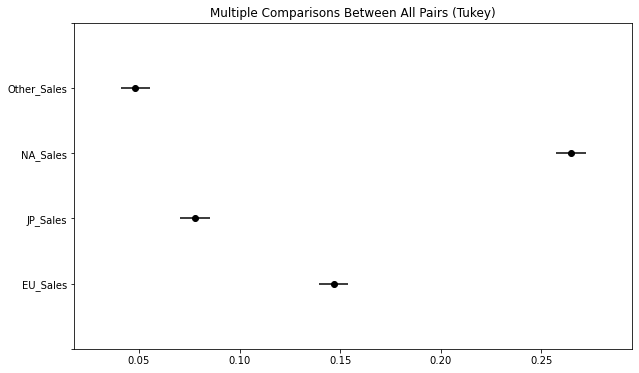

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(data_melt['Sales'], data_melt['Sale_Area'], alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

### 3. 통계분석(2)

플랫폼(Platform 변수)과 장르(Genre 변수)의 독립성 검정

- 전체 판매량은 Global_Sales 변수 사용

- 플랫폼(Platform 변수)과 장르(Genre 변수)가 서로 독립인지 확인하기 위해 분할표를 생성하고, 가설에 따른 검정을 수행하고 그 결과를 해석해라 [ 유의수준 0.05 기준 ]

In [ ]:
# 참고 (데이터셋변형)

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33


In [73]:
data[(data['Genre']=='Adventure') & (data['Platform']=='2600')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1513,1515,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30
4780,4782,Pengo,2600,1983.00,Adventure,Atari,0.38,0.02,0.00,0.00,0.40


In [76]:
data_tab = pd.crosstab(index=data['Genre'],columns=data['Platform'])
data_tab

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33


In [85]:
from scipy import stats
result =stats.chi2_contingency(data_tab)
print('P-value : ' ,result[1])

P-value :  0.0


#### 독립성 검정

귀무가설 : 플랫폼(Platform 변수)과 장르(Genre 변수)가 독립이다 연관성이없다, 관련이 없다

연구가설 : 플랫폼(Platform 변수)과 장르(Genre 변수)가 독립이 아니다, 연관성이 있다, 관련이 있다.

Pvalue 가 0이기 때문에 연구가설 채택 => 플랫폼과 장르가 연관성이 있다.

### 4. 모델링 및 예측

- 3가지 모델을 선택하여 모델링하고, 모델을 선택한 이유를 서술
- 3가지 성능지표로 모델을 측정하고, 지표를 선택한 이유를 서술

## 데이터 구조 확인

In [89]:
data.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16598,16598,16327.00,16598,16540,16598.00,16598.00,16598.00,16598.00,16598.00
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.61,NaN,NaN,2006.41,NaN,NaN,0.26,0.15,0.08,0.05,0.54
std,4791.85,NaN,NaN,5.83,NaN,NaN,0.82,0.51,0.31,0.19,1.56
min,1.00,NaN,NaN,1980.00,NaN,NaN,0.00,0.00,0.00,0.00,0.01
25%,4151.25,NaN,NaN,2003.00,NaN,NaN,0.00,0.00,0.00,0.00,0.06
50%,8300.50,NaN,NaN,2007.00,NaN,NaN,0.08,0.02,0.00,0.01,0.17
75%,12449.75,NaN,NaN,2010.00,NaN,NaN,0.24,0.11,0.04,0.04,0.47


In [87]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Text(0.5, 1.0, 'Total Missing Value (%)')

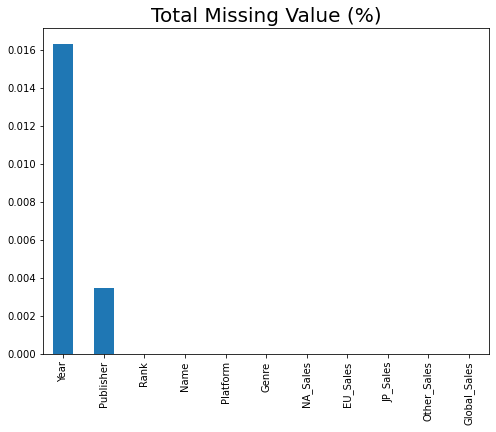

In [114]:
# 파이썬에서는 .isnull()을 통해서 결측치를 확인할 수 있습니다.
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

Year피쳐 271, Publisher 피쳐 58 개 의 null값을 어떻게 처리 해야 할지 고민

In [119]:
data['Name'].value_counts()

Need for Speed: Most Wanted    12
Ratatouille                     9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
FIFA 14                         9
                               ..
MXRider                         1
Triple Play 2001                1
Fishing Master World Tour       1
Wild Earth: African Safari      1
Metal Slug XX                   1
Name: Name, Length: 11493, dtype: int64

## 데이터 시각화하기 연습
각 피쳐별로 시각화 연습

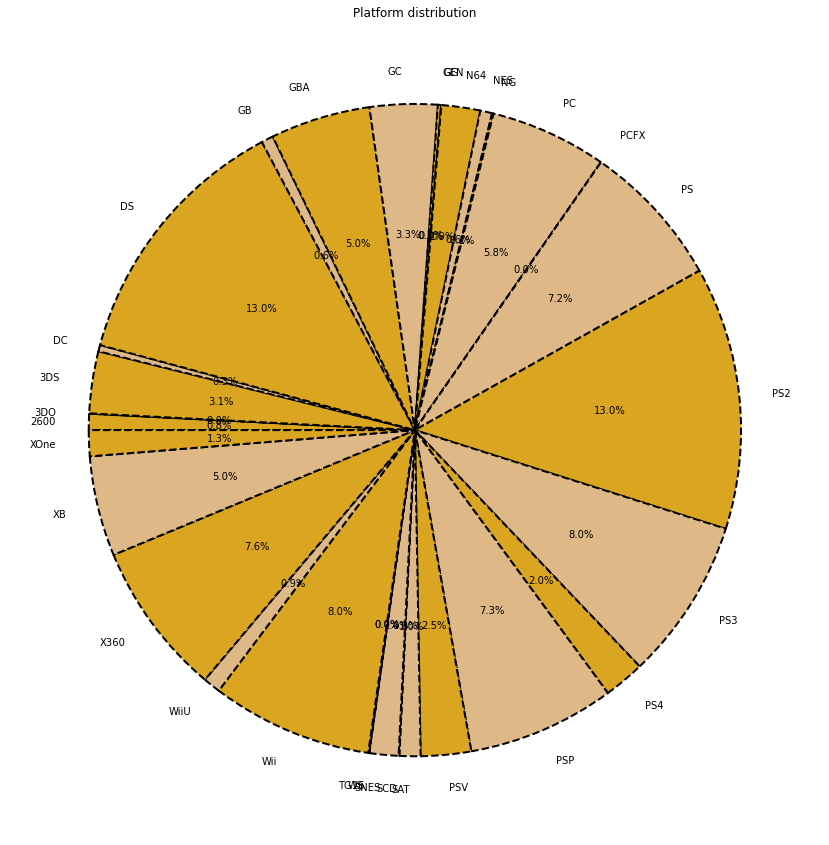

In [131]:
df1= data.groupby('Platform').count()['Rank']
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,
        autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Platform distribution')
plt.show()

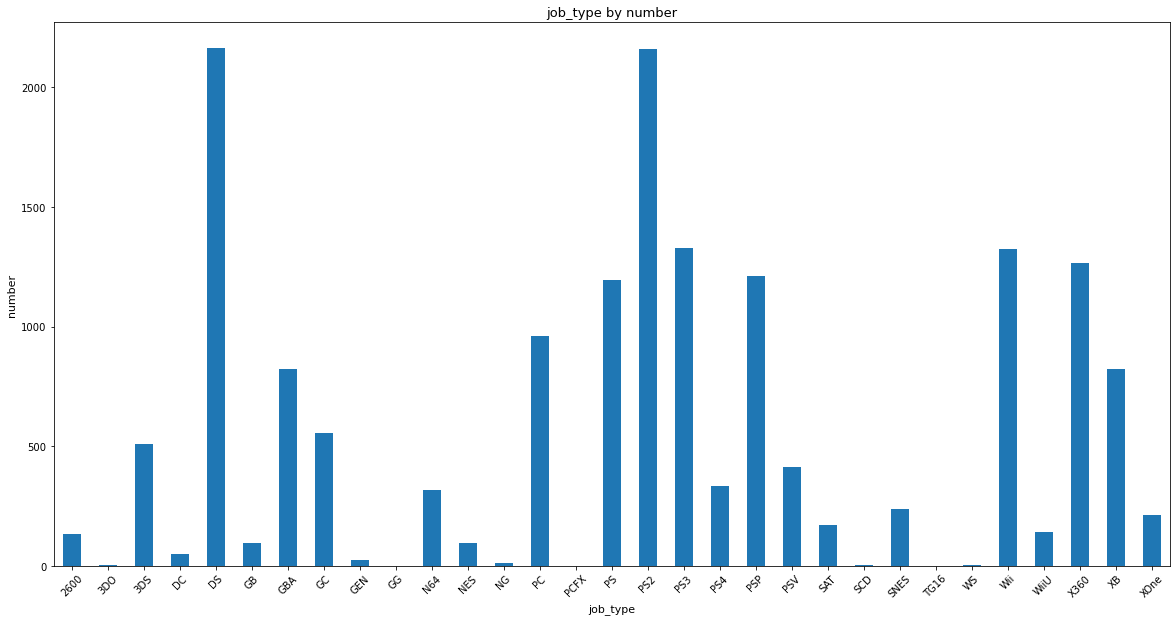

In [6]:
ot = data.groupby('Platform').count()['Rank']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('job_type',fontsize=11)
plot.set_ylabel('number',fontsize=11)
plot.set_title('job_type by number',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)
plt.show()

In [130]:
data['Platform'].value_counts().head()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64

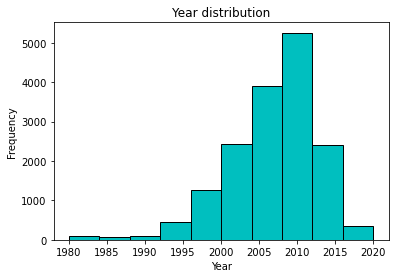

In [135]:
data['Year'].plot.hist(color='c', edgecolor='k')
plt.xlabel('Year')
plt.title('Year distribution')
plt.show()

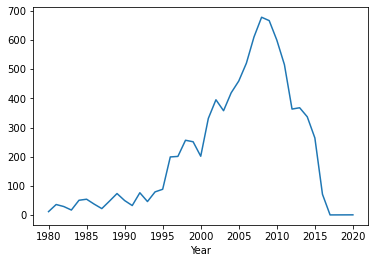

In [151]:
data_year_sum = data.groupby('Year')['Global_Sales'].sum()
data_year_sum.plot()
plt.show()
# data_year_sum

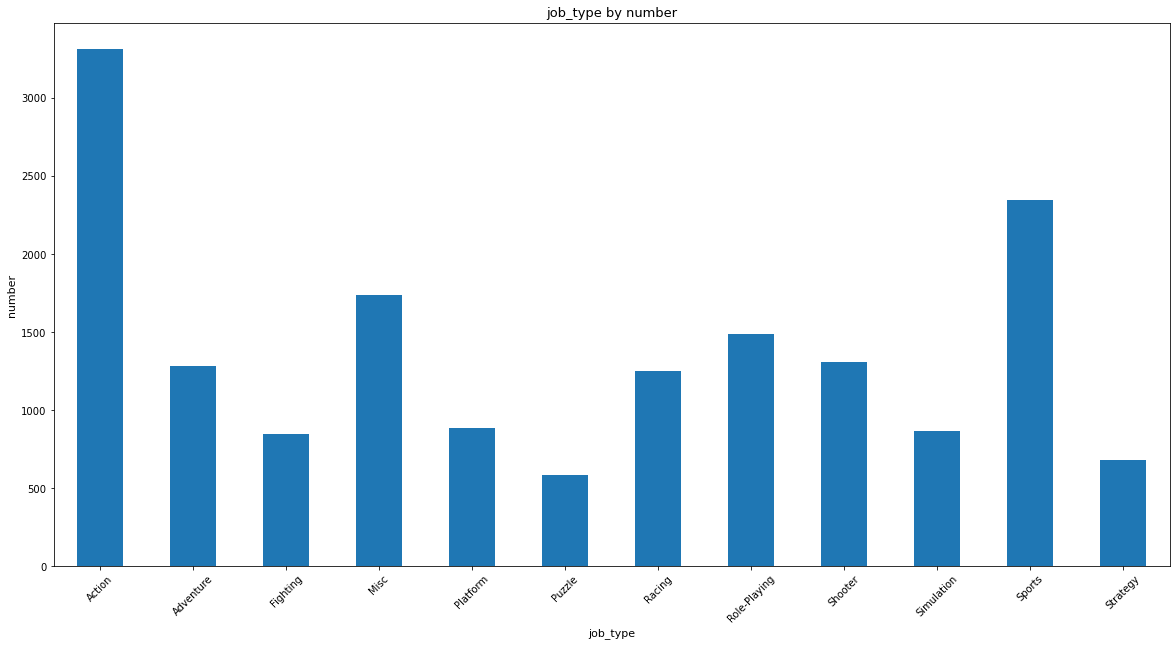

In [9]:
ot = data.groupby('Genre').count()['Rank']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('job_type',fontsize=11)
plot.set_ylabel('number',fontsize=11)
plot.set_title('job_type by number',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)
plt.show()

In [21]:
print('Publisher unique == ', len(np.unique(data['Publisher'].dropna())))
data['Publisher'].value_counts()

Publisher unique ==  578


Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Graphsim Entertainment             1
Valve                              1
Marvelous Games                    1
Media Entertainment                1
Mycom                              1
Name: Publisher, Length: 578, dtype: int64

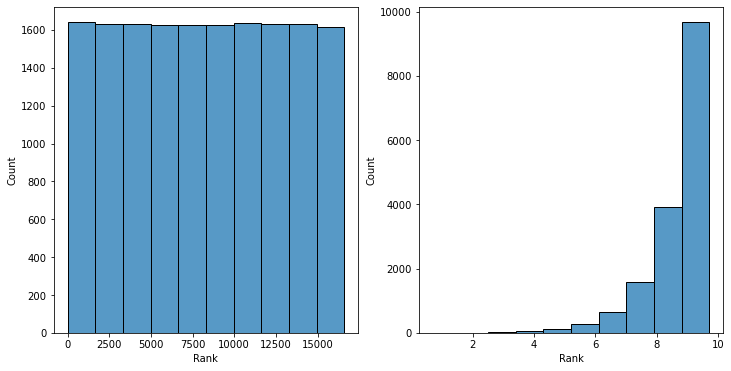

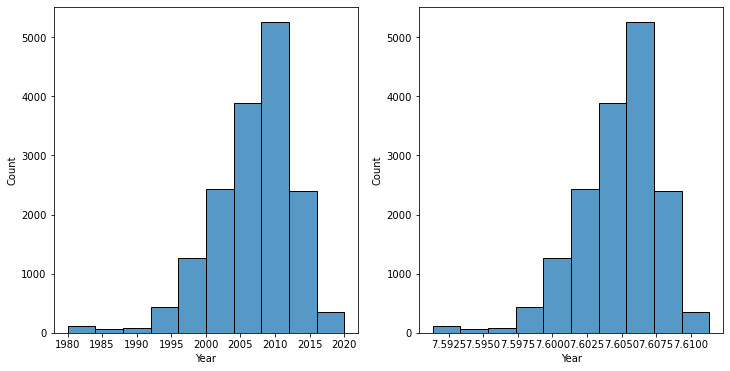

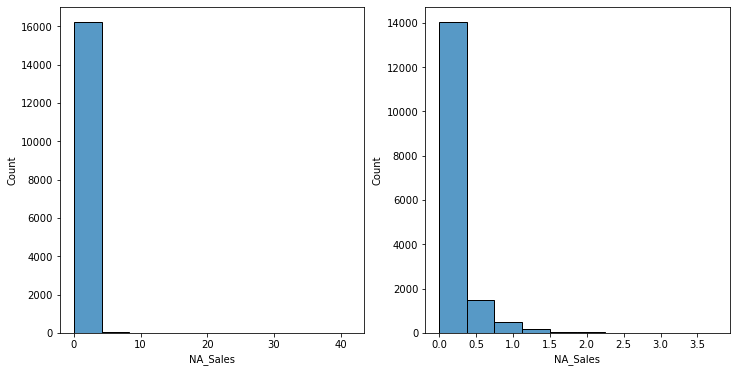

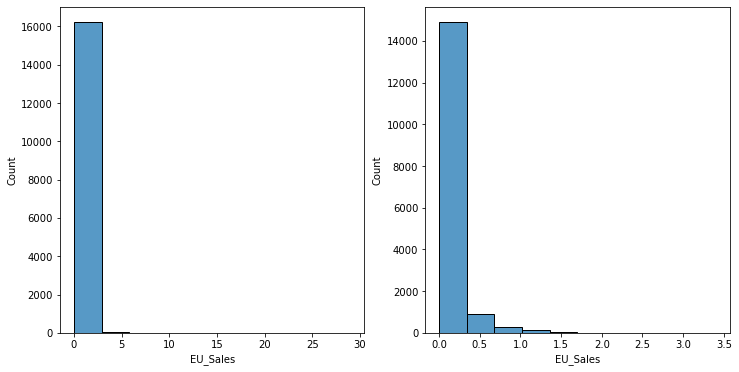

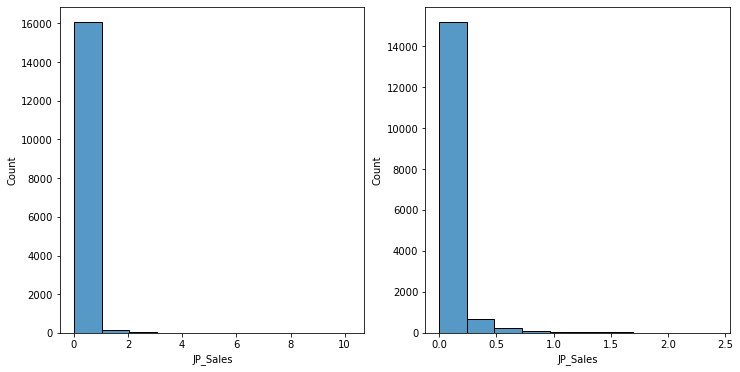

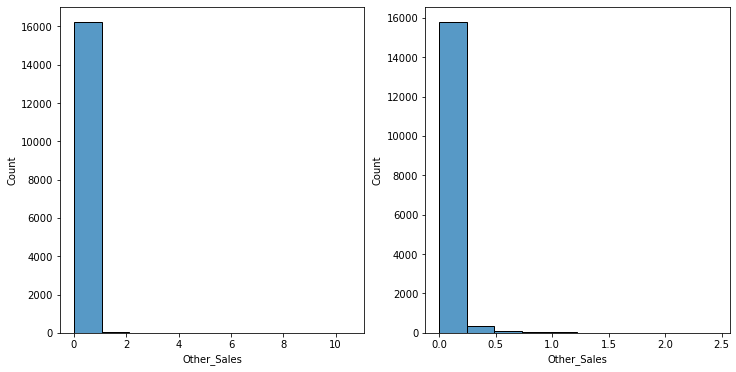

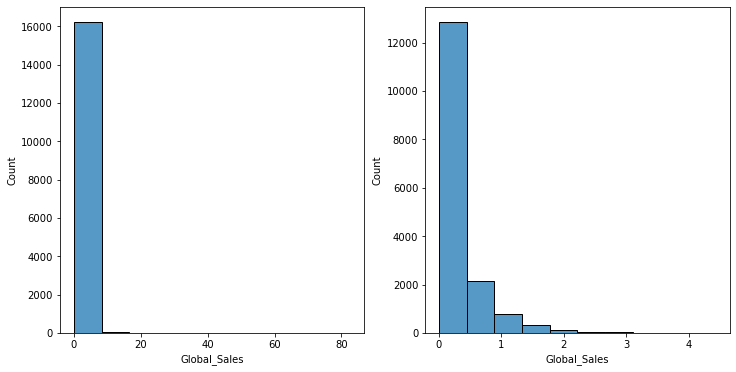

In [167]:
import seaborn as sns

numerical_feature = [ col for col in data.columns if data[col].dtypes != "object"]

for i in numerical_feature:

    f, ax = plt.subplots(1,2,figsize=(12,6))
    
    sns.histplot(x=data[i],bins=10, ax=ax[0])    
    
    sns.histplot(x=np.log1p(data[i]),bins=10, ax=ax[1])

    plt.show()

### 종속변수 시각화

count   16291.00
mean        0.54
std         1.57
min         0.01
25%         0.06
50%         0.17
75%         0.48
max        82.74
Name: Global_Sales, dtype: float64

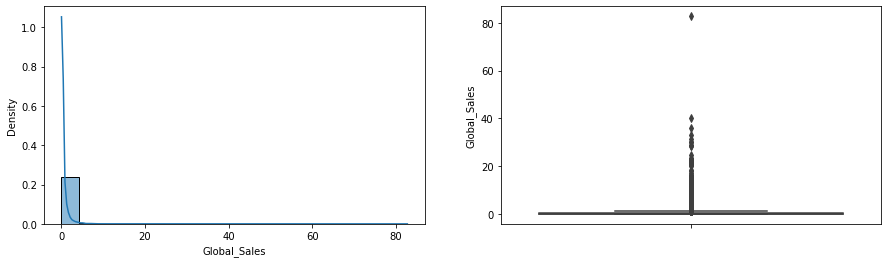

skew == 17.30431167518343


In [165]:
display(data['Global_Sales'].describe())

f, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data['Global_Sales'], bins=20,ax=axs[0],kde=True,stat="density")
sns.boxplot(y='Global_Sales', data = data, ax=axs[1])
plt.show()
print("skew ==", data['Global_Sales'].skew() )

### 변수 상관관계

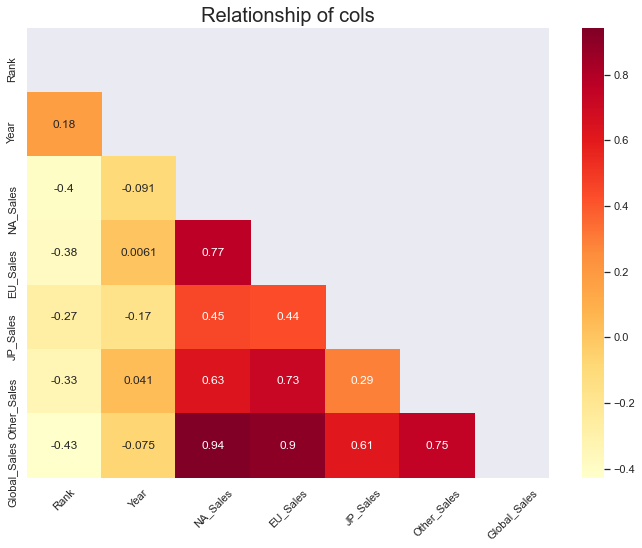

In [168]:
import numpy as np

corr_df = data.corr()

# 사이즈 조정
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 절반만 표시하기 위한 mask 설정
mask=np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(corr_df,
                 annot=True, # 데이터 값 표시
                 mask=mask, # 마스크 적용 표시
                 cmap='YlOrRd') # 노랑 / 오렌지 / 빨강

plt.xticks(rotation=45)
plt.title('Relationship of cols', fontsize=20)
plt.show() 

### 상관관계 해석

종속변수 Global_Sales 와 NA_Sales, Eu_Sales, JP_Sales, Other_Sales 당연하게 상관관계가 높다고 나온다.

데이터 분석을 할때에는 제거를 수행 하도록 한다.

## 데이터 전처리

1. 결측치 제거

1. Rank 컬럼 및 다중공선성이 높은 NA_Sales,EU_Sales,JP_Sales,Other_Sales 피처 삭제
    
1. 문자열 피처는 원핫 인코딩 적용- Count 기반의 벡터화 수행

### 결측치 제거

In [2]:
'''
null 삭제
'''
data = data.dropna()

In [3]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:

X_features = data.drop(['Rank','Global_Sales'], axis = 1)
y = data['Global_Sales']

In [5]:
X_features

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00


### 피쳐 벡터화 수행

Name 피쳐는 Count 기반 벡터화 수행

Platform, Year, Genre, Publisher 는 LabelBinarizer을 이용한 원한 인코딩 피처들을 희소행렬 변환

In [30]:
'''
CountVectorizer 샘플
'''
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [28]:
pd.DataFrame(vect.transform(corpus).toarray(), columns=vect.get_feature_names())

,and,document,first,is,last,one,second,the,third,this
0,0,1,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,2,1,0,1
2,1,0,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,0,1,0,1
4,0,1,0,0,1,0,0,1,0,0


<font size="5" > Name 피쳐 CountVectorizer 수행</font>

In [38]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(X_features['Name'])

<font size="5" > Platform,Genre,Publisher,Year 피쳐 LabelBinarizer을 수행</font>

In [77]:
from sklearn.preprocessing import LabelBinarizer
game_Platform = LabelBinarizer(sparse_output=True)
X_Platform = game_Platform.fit_transform(X_features['Platform'])

game_Genre = LabelBinarizer(sparse_output=True)
X_Genre = game_Genre.fit_transform(X_features['Genre'])

game_Publisher = LabelBinarizer(sparse_output=True)
X_Publisher = game_Publisher.fit_transform(X_features['Publisher'])

game_Year = LabelBinarizer(sparse_output=True)
X_Year = game_Year.fit_transform(X_features['Year'])

In [78]:
print(type(X_name), type(X_Platform), type(X_Genre))
print('X_name:{0}, X_Platform shape:{1}'.format(X_name.shape, X_Platform.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_name:(16291, 8739), X_Platform shape:(16291, 31)


In [79]:
import gc 
from  scipy.sparse import hstack
from scipy import sparse

sparse_matrix_list = (X_name, X_Platform, X_Genre, X_Publisher, X_Year)
'''
hstack 으로 합치고 csr 형태로 변환
'''
X= hstack(sparse_matrix_list).tocsr()  

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  y, 
                                              test_size=0.2, random_state=156)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,\
                mean_absolute_percentage_error, r2_score

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    mse = mean_squared_error(y,pred)
    mape = mean_absolute_percentage_error(y,pred)
    r2 = r2_score(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.
                              format(rmsle_val, rmse_val, mae_val))
    print('MSE :{0:.3F}, MAPE :{1:.3F}, R2 :{2:.3F}  '.
                              format(mse, mape, r2))
    
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, 
                                  y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict      

def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - 
                                   result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

def visualize_coefficient(models):
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
         # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
        fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)        
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
#         print(coef_high, coef_low)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 
        # tick label 위치와 font 크기 조정. 
        axs.set_title(model.__class__.__name__+' Coeffiecents', size=25)
        
        for label in (axs.get_xticklabels() + axs.get_yticklabels()):
            label.set_fontsize(22)
            
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs)

### LinearRegression 수행

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.699, RMSE: 1.721, MAE: 0.925
MSE :2.963, MAPE :14.680, R2 :-0.494  


<ipython-input-46-3d2b73b8e528>:7: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [82]:
pred[pred < 0] = 0

In [83]:
evaluate_regr(y_test,pred)

RMSLE: 0.477, RMSE: 1.499, MAE: 0.673
MSE :2.247, MAPE :8.460, R2 :-0.133  


### RandomForest 수행

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
rfr_preds = rfr_model.predict(X_test)

evaluate_regr(y_test,rfr_preds)

RMSLE: 0.288, RMSE: 1.067, MAE: 0.361
MSE :1.139, MAPE :2.070, R2 :0.426  


### XGBRegressor 수행

In [85]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_preds = xgb_model.predict(X_test)
evaluate_regr(y_test,xgb_preds)

RMSLE: 0.304, RMSE: 1.061, MAE: 0.413
MSE :1.126, MAPE :3.511, R2 :0.432  


# 'NA_Sales','EU_Sales','JP_Sales','Other_Sales' 피쳐를 넣고 수행 하였을 경우

In [72]:
import gc 
from  scipy.sparse import hstack
from scipy import sparse

sparse_matrix_list = (X_name, X_Platform, X_Genre, X_Publisher, X_Year,
                     sparse.csr_matrix(X_features[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]))

X= hstack(sparse_matrix_list).tocsr()  

In [73]:
X_train, X_test, y_train, y_test=train_test_split(X,  y, 
                                              test_size=0.2, random_state=156)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.006, RMSE: 0.008, MAE: 0.005
MSE :0.000, MAPE :0.077, R2 :1.000  


#

# 회귀 모델 성능 평가 지표

## MAE(Mean Absolute Error) = 평균 절대 오차
실제 정답 값과 예측 값의 차이를 절댓값으로 변환한 뒤 합산하여 평균을 구한다.

특이값이 많은 경우에 주로 사용된다. 값이 낮을수록 좋다. 이상치에 둔감 혹은 강건robust하다. 그 이유는 MAE는 위 MSE, RMSE에 비해, 오차값이 outlier의 영향을 상대적으로 크게 받지 않는다. 이것은 단점이 될수 있음.

모든 오차에 동일한 가중치를 부여한다. 이는 MSE, RMSE와 대조된다.

MAE = \frac{\sum{\vert y-\hat{y} \vert}}{n}

<font size="5">$MAE = \frac{\sum{\vert y-\hat{y} \vert}}{n}$</font>

장점

- 인간이 보기에 직관적으로 차이를 알 수 있다는 장점이 있다(원래 데이터와 스케일이 같아 이해하기 직관적이다 )
- 정답 및 예측 값과 같은 단위를 가짐

단점

- 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
- 이상치에 대해 robust한 결과를 보여주어 오차에 덜 민감하다는 단점
- 스케일 의존적임(scal dependency): 모델마다 에러 크기가 동일해도 에러율은 동일하지 않음

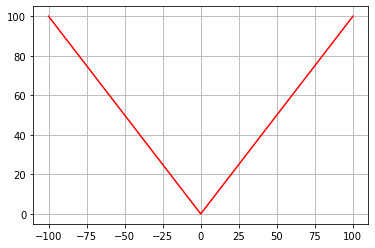

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MAE loss function
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

plt.plot(x_vals, y_vals, "red")
plt.grid(True, which="major")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [ ]:
import numpy as np

def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

MAE(y_true, y_pred)

## MSE(Mean Squared Error) = 평균 제곱 오차

MSE = \frac{\sum_{i=1}^{n}({y-\hat{y}})^2}{n}

<font size="5">$MSE = \frac{\sum_{i=1}^{n}({y-\hat{y}})^2}{n}$</font>

MSE(Mean Squared Error)는 오차의 제곱을 평균으로 나눈 것인데, 예측값과 실제값 차이의 면적의 평균이라고 할 수 있다. 

오차를 제곱하기 때문에 이상치에 민감하다. 또한 1미만의 에러는 더 작아지고, 그 이상의 에러는 더 커진다. 제곱한 값이기 때문에 예측 변수와 단위가 다르다는 단점도 있다. 예를 들어 기온을 예측하는 모델의 MSE가 4이라면 이 모델은 평균적으로 2도 정도를 잘못 예측하는 것으로 보아야 한다. 

결국 제곱을 씌우게 되어 underestimates/overestimates인지 파악하기 힘들며 MAE처럼 스케일에 의존적이다. MSE 기반 방식은 모두 underestimates/overestimates 파악이 힘들다.

오차제곱합(SSE)와 유사하지만 오차제곱합으로는 실제 오차가 커서 값이 커지는 것인지 데이터의 양이 많아서 값이 커지는 것인지를 구분할 수 없게 된다.

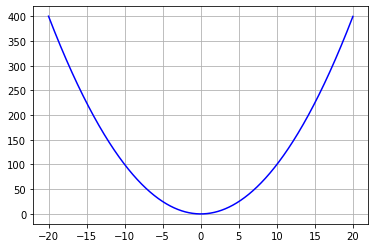

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

plt.plot(x_vals, y_vals, "blue")
plt.grid(True, which="major")
plt.show()

In [ ]:
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

MSE(y_true, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

## RMSE(Root Mean Squared Error) = 평균 제곱근 오차

RMSE = \sqrt { \frac { \sum (y - \hat y)^2 }{n} }

<font size="5">$RMSE = \sqrt { \frac { \sum (y - \hat y)^2 }{n} }$</font>

RMSE(Root Mean Squared Error)는 MSE값에 루트를 씌운 값이다. MAE와 비슷해보이지만 전체 오류를 모두 더한 다음 root를 씌우기 때문에 MSE 가 가지는 단점을 보완한다.(오차의 왜곡)

RMSE 또한 스케일에 의존적이며 제곱 후 루트를 씌우기 때문에 MAE처럼 실제 값에 대해 underestimates/overestimates인지 파악하기 힘들다.

동일한 계산 단위를 적용하는 MAE에 비해 RMSE를 사용하는 이유는 잔차를 제곱하고 다 더한 뒤 제곱근을 통해 큰 오류 값에 페널티를 부여해, 에러에 덜 민감한 장점이 있기 때문입니다. 

장점

- 직관적임

단점

- 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
- 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
- 스케일 영향을 받는다는 단점은 여전히 가지고 있다.

In [ ]:
np.sqrt(MSE(y_true, y_pred))

In [ ]:
def RMSE(y, t):
    return np.sqrt(((y - t) ** 2).mean(axis=None))

## RMSE & MAE 지표 선택 방법

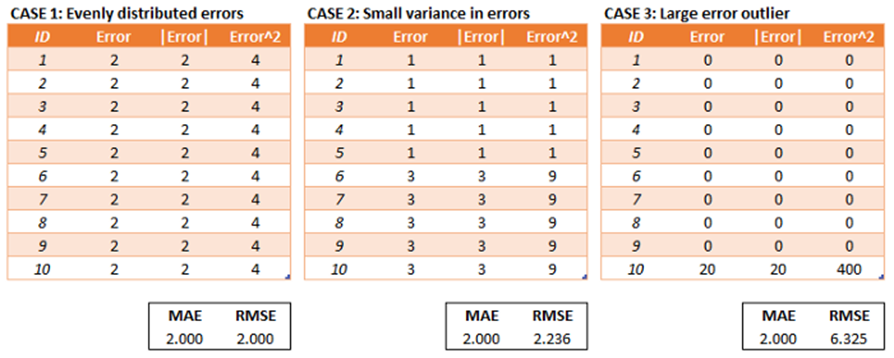

- MAE 선택
-> 약간의 이상치가 있는 경우, 그 이상치의 영향을 적게 받으면서 모델을 만들고자 할 때, MAE를 쓰는 것이 적절하다. 전술했듯이, MAE는 이상치에 대해 강건robust하기 때문에 이상치에 영향을 덜 받는다. 이는 이상치를 포함한 훈련 데이터에 적합하게 학습되어 unseen 데이터에 대해 낮은 성능을 보이게 하는 오버 피팅을 방지하는 데 도움이 될 수 있다.

- RMSE 선택
-> RMSE는 MSE 보다 이상치에 대해 상대적으로 둔감하다. 하지만 이는 MAE처럼 모든 error에 동일한 가중치를 주지 않고, error가 크면 더 큰 가중치를 작으면 더 작은 가중치를 준다는 점에서, 여전히 이상치에 민감하다고 간주될 수 있다. 따라서 모델 학습 시 이상치에 가중치를 부여하고자 한다면, MSE에 루트를 씌운 RMSE를 채택하는 것은 적절하다

<font size="5"> 예시 </font>

상황 1) 소매업자 수요 예측

상황 2) 발전소의 온도 조절계를 위한 통계모델 설정


소매업자 에러에 대한 피해는 선형적이다. 실제 수요가 내가 예측한 것보다 10개 적다면, 10개 적은 만큼 덜 팔린다. 

발전소의 온도는 비선형 적이다. 온도가 1도 올랐을 때 위험도/피해가 기하급수적으로 상승할 수 있다. (적정온도를 넘었을 때).

이런 경우에서는 상황 

1) 소매업자 수요 예측 모델에 대한 평가 지표는 MAE,  

2) 발전소 온도 조절계를 위한 통계모델 설정은 RMSE를 쓰는 것이 합리적이다.


## MAPE(Mean Absolute Percentage Error) = 평균 절대 비율 오차

MAPE = \frac { \sum \vert \frac { y - \hat y}{y} \vert }{n}*100\%

<font size="5"> $MAPE = \frac { \sum \vert \frac { y - \hat y}{y} \vert }{n}*100\%$</font>

MPE는 예측오차를 단순히 합계를 내었기 때문에 전체적인 크기를 제대로 산정할 수 없습니다(오차는 음수, 양수가 있기 때문에 합계를 내면 0이 되는 경우가 발생합니다).  

MAPE(Mean of Absolute Percentage Errors)는 그러한 문제점을 개선한 지표로 예측오차에 절대값을 씌어서 계산하며 정확한 계산식은 다음과 같습니다.

장점

- 직관적임
- 다른 모델과 에러율 비교가 쉬움

단점

- 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
- 실제 정답이 1보다작을 경우,무한대의 값으로 수렴할 수 있음

In [ ]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE(y_true, y_pred)

## MPE(Mean Percentage Error)

MAE = \frac { \sum ( y - \hat y ) }{n}* 100\%

<font size="5">$MAE = \frac { \sum ( y - \hat y ) }{n}* 100\%$</font>

RMSE와 MAE 같은 지표들은 모두 참값과 예측값의 절대적인 예측오차에 기반해 예측오차의 크기를 나타내는 지표이다. 그러나 예측오차는 절대적인 의미의 예측오차뿐 아니라 상대적인 의미의 예측오차가 필요할 경우에도 발생하는데, 예를 들어 참값 10에 대한 예측오차 1과 참값 100에 대한 예측오차 1의 경우, 같은 예측오차가 1이라도 상대적인 의미의 오차 크기는 다르다. 하지만 모델이 underestimates/overestimates인지 판단할 수 있다는 장점이 있다.

In [ ]:
def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100
MPE(y_true, y_pred)

## RMSLE(Root Mean Squared Log Error)

\sqrt \frac{\sum_{i=1}^{n}({y-\hat{y}})^2}{n}

<font size="5">RMSLE = $log(\sqrt \frac{\sum_{i=1}^{n}({y-\hat{y}})^2}{n})$</font>

RMSLE(Root Mean Squared Log Error)는 RMSE값에 로그를 취한 값이다. 결정 값이 클 수록 오류 값도 커지기 때문에 일부 큰 오류 값들로인해 전체 오류값이 커지는 것을 막아준다.

1. 아웃라이어에 덜 민감하다. (robust) : 아웃라이어가 있더라도 값의 변동폭이 크지 않다.
2. 상대적 Error를 측정해준다. 

    값의 절대적 크기가 커지면 RMSE의 값도 커지지만, RMSLE는 상대적 크기가 동일하다면 RMSLE의 값도 동일하다.

    예측값 = 100, 실제값 = 90일 때, RMSLE = 0.1053, RMSE = 10

    예측값 = 10,000, 실제값 = 9,000일 때, RMSLE = 0.1053, RMSE = 1,000
    
3. Under Estimation에 큰 패널티를 부여

    RMSLE 그래프를 보면 예측값이 실제값보다 작을 경우 더 큰 패널티를 부여한다.
    택시를 타고 이동한다고 가정했을 때

    예측 소요 시간이 30분이라고 했으나 실제로 40분이 걸린다면 (예측값 < 실제값) 

    소비자가 더 분노하는 것과 비슷한 개념이다.
    
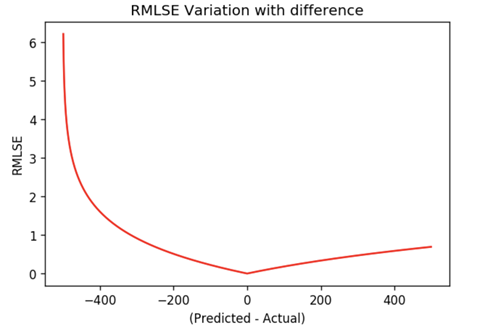    

In [ ]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

## MSLE(Mean Squared Log Error)

- MSLE(Mean Squared Log Error)는 MSE에 로그를 적용한 것이다. 결정 값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아준다.
-> log에서 진수(argument)가 1이하면 음수가 되므로 이를 보정하고자 +1을 한다
- log의 영향으로 outlier에 robust해진다.
- 관측값과 예측값의 비율을 따지게 되므로 scale의 보정이 일어난다.
-> log의 성질
-> log의 성질에 의해 |관측값-예측값|이 같더라도,관측값>예측값인 경우에 더 큰 값을 갖는다.
-> Example
        두 경우 |관측값-예측값|=5로 동일
        관측값 = 4, 예측값 = 9 -> error = 0.1597
        관측값 = 9, 예측값 = 4 -> error = 0.5118

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_true, y_pred)

In [ ]:
def MSLE(y, t):
    return np.log((y-t)**2).mean(axis=None)

## R2 score = R squard

R-squared는 선형 회귀 모델에 대한 적합도 측정값이다. 선형 회귀 모델을 Fitting 한 후, 모델이 데이터에 얼마나 적합한지 확인해야 하는데 몇가
지 주요 적합도 통계 방법중 하나이다. 

다른 지표(MAE, MSE, RMSE)들은 모델마다 값이 다르기 때문에 절대 값만 보고 선능을 판단하기 어렵다.

R2 score는 상대적인 성능을 나타내기 비교가 쉽다.

실제 값의 분산 대비 예측값의 분산 비율을 의미한다.

1에 가까울 수록 좋다.

R 제곱 = 예측값 Variance / 실제값 Variance

<font size="5">${R}^2=1\ -\ \frac{SSE}{SST}$  </font>

<font size="5">$SST\ =\ {\sum _i^{\ }\left({y}_i-\overline {y}\right)}^2$  </font>

<font size="5">$SSE\ =\ {\sum _i^{\ }\left({y}_i-{\hat{y}}_i\right)}^2$  </font>

SST는 각 데이터 포인트가 평균과 갖는 차이(편차)를 제곱하여 합한 값이다.

SSE는 각 데이터 포인트와 예측된 값의 차이(오차)를 제곱하여 합한 값이다.

In [ ]:
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, 
                multioutput='uniform_average')